### We can classify the lower wear of girls in different categories.

1. Pants
2. Plazo
3. Shorts
4. Harem
5. Leggings

In [2]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [3]:
from PIL import Image

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import pandas as pd

In [6]:
from sklearn.metrics import classification_report

In [7]:
path_to_data = "./dataset"

In [8]:
import pathlib
path_to_data = pathlib.Path(path_to_data)
path_to_data

WindowsPath('dataset')

In [9]:
list(path_to_data.glob("*/*.jpg"))[:5]

[WindowsPath('dataset/1_Pants/Pants (1).jpg'),
 WindowsPath('dataset/1_Pants/Pants (10).jpg'),
 WindowsPath('dataset/1_Pants/Pants (100).jpg'),
 WindowsPath('dataset/1_Pants/Pants (101).jpg'),
 WindowsPath('dataset/1_Pants/Pants (102).jpg')]

In [10]:
list(path_to_data.glob("*/*.jpg"))[-5:]

[WindowsPath('dataset/5_Leggings/Leggings (6).jpg'),
 WindowsPath('dataset/5_Leggings/Leggings (7).jpg'),
 WindowsPath('dataset/5_Leggings/Leggings (8).jpg'),
 WindowsPath('dataset/5_Leggings/Leggings (9).jpg'),
 WindowsPath('dataset/5_Leggings/Leggings1 (1).jpg')]

In [11]:
leggings = list(path_to_data.glob("5_Leggings/*.jpg"))
leggings[-5:]

[WindowsPath('dataset/5_Leggings/Leggings (6).jpg'),
 WindowsPath('dataset/5_Leggings/Leggings (7).jpg'),
 WindowsPath('dataset/5_Leggings/Leggings (8).jpg'),
 WindowsPath('dataset/5_Leggings/Leggings (9).jpg'),
 WindowsPath('dataset/5_Leggings/Leggings1 (1).jpg')]

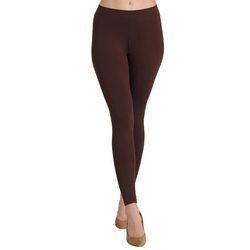

In [12]:
Image.open(str(leggings[-5]))

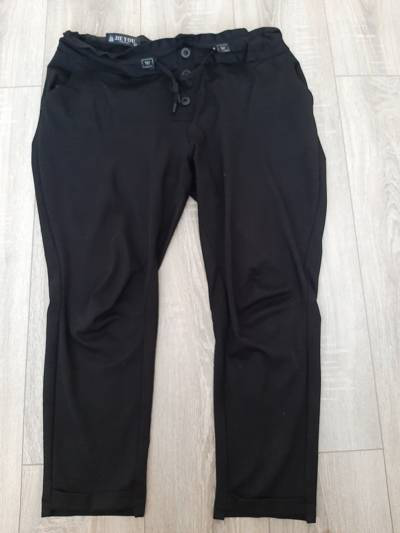

In [13]:
pants = list(path_to_data.glob("1_Pants/*.jpg"))
Image.open(str(pants[100]))

##### Read from disc into numpy array using openCV

In [14]:
fashion_images_dict = {
    "pants":list(path_to_data.glob("1_Pants/*.jp*g")),
    "plazo":list(path_to_data.glob("2_Plazo/*.jp*g")),
    "shorts":list(path_to_data.glob("3_Shorts/*.jp*g")),
    "harem":list(path_to_data.glob("4_Harem/*.jp*g")),
    "leggings":list(path_to_data.glob("5_Leggings/*.jp*g"))
}

In [15]:
len(fashion_images_dict["leggings"])

164

In [16]:
fashion_labels_dict = {
    "pants" : 0,
    "plazo" : 1,
    "shorts": 2,
    "harem" : 3,
    "leggings": 4
}

In [17]:
fashion_images_dict["shorts"][7]

WindowsPath('dataset/3_Shorts/Shorts (105).jpg')

In [18]:
str(fashion_images_dict["shorts"][7])

'dataset\\3_Shorts\\Shorts (105).jpg'

In [19]:
img = cv2.imread(str(fashion_images_dict["shorts"][7]))

In [20]:
img

array([[[ 92, 122, 157],
        [ 92, 122, 157],
        [ 94, 122, 157],
        ...,
        [155, 178, 200],
        [153, 176, 198],
        [151, 174, 196]],

       [[ 93, 123, 158],
        [ 93, 123, 158],
        [ 95, 123, 158],
        ...,
        [164, 187, 209],
        [162, 185, 207],
        [162, 185, 207]],

       [[ 95, 125, 160],
        [ 94, 124, 159],
        [ 96, 124, 159],
        ...,
        [170, 193, 215],
        [170, 193, 215],
        [170, 193, 215]],

       ...,

       [[176, 199, 207],
        [177, 200, 208],
        [180, 203, 211],
        ...,
        [209, 229, 240],
        [210, 230, 241],
        [210, 230, 241]],

       [[177, 200, 208],
        [178, 201, 209],
        [178, 201, 209],
        ...,
        [209, 229, 240],
        [210, 230, 241],
        [211, 231, 242]],

       [[178, 201, 209],
        [177, 200, 208],
        [173, 196, 204],
        ...,
        [211, 231, 242],
        [212, 232, 243],
        [213, 233, 244]]

In [21]:
img.shape

(533, 400, 3)

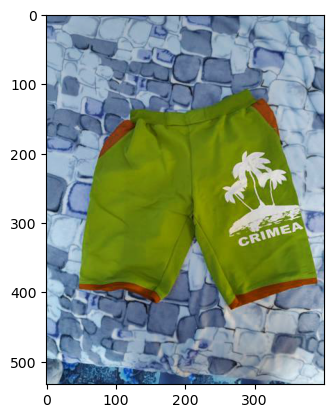

In [22]:
plt.imshow(img)

In [23]:
cv2.resize(img, (32,32)).shape

(32, 32, 3)

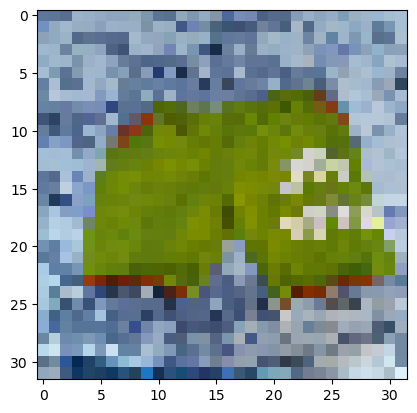

In [24]:
plt.imshow(cv2.resize(img, (32,32)))

In [25]:
X, y = [] , []

for name, images in fashion_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(32,32))
        X.append(resized_img)
        y.append(fashion_labels_dict[name])

In [26]:
len(X)

752

In [27]:
X = np.array(X)
y = np.array(y)

In [28]:
X.shape

(752, 32, 32, 3)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21, stratify=y)

In [30]:
X_train.shape, X_test.shape

((601, 32, 32, 3), (151, 32, 32, 3))

In [31]:
pd.Series(y_train).value_counts()

2    187
4    131
0    126
1    114
3     43
Name: count, dtype: int64

In [32]:
pd.Series(y_test).value_counts()

2    47
4    33
0    32
1    28
3    11
Name: count, dtype: int64

In [33]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [34]:
X_test_scaled.shape

(151, 32, 32, 3)

### Data augmentation

In [35]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 
                                                              32,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

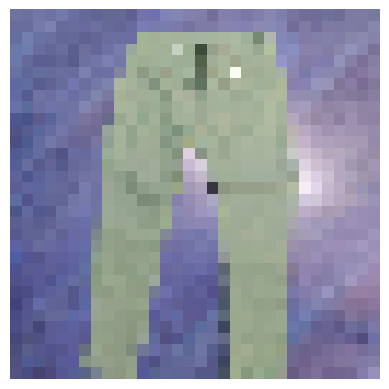

In [36]:
plt.axis("off")
plt.imshow(X[0])

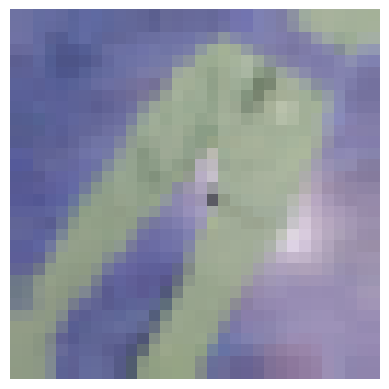

In [37]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Build Convolutional Neural Network

In [38]:
model1 = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(20, 3, padding = "same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(15, 3, padding = "same", activation="relu"),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(input_shape=(32,32)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(5,activation="sigmoid")
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model1.fit(X_train_scaled, y_train, epochs=50)      

Epoch 1/50


C:\Users\khushi\anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


19/19 [==============================] - 8s 39ms/step - loss: 1.5762 - accuracy: 0.2729
Epoch 2/50
19/19 [==============================] - 1s 40ms/step - loss: 1.4901 - accuracy: 0.4027
Epoch 3/50
19/19 [==============================] - 1s 39ms/step - loss: 1.3856 - accuracy: 0.4376
Epoch 4/50
19/19 [==============================] - 1s 40ms/step - loss: 1.2882 - accuracy: 0.5025
Epoch 5/50
19/19 [==============================] - 1s 39ms/step - loss: 1.1962 - accuracy: 0.5641
Epoch 6/50
19/19 [==============================] - 1s 39ms/step - loss: 1.1602 - accuracy: 0.5524
Epoch 7/50
19/19 [==============================] - 1s 50ms/step - loss: 1.0746 - accuracy: 0.6073
Epoch 8/50
19/19 [==============================] - 1s 39ms/step - loss: 1.0331 - accuracy: 0.6273
Epoch 9/50
19/19 [==============================] - 1s 40ms/step - loss: 0.9793 - accuracy: 0.6323
Epoch 10/50
19/19 [==============================] - 1s 39ms/step - loss: 0.9847 - accuracy: 0.6256
Epoch 11/50
19/19 [=

In [39]:
model1.evaluate(X_test_scaled,y_test)

5/5 [==============================] - 1s 13ms/step - loss: 0.8194 - accuracy: 0.7285


[0.8193789720535278, 0.7284768223762512]

In [40]:
y_predict = model1.predict(X_test_scaled)

5/5 [==============================] - 0s 8ms/step


In [41]:
y_predict[:5]

array([[0.96625966, 0.88270885, 0.01567055, 0.07477912, 0.93432474],
       [0.79904467, 0.96720916, 0.01059726, 0.15758799, 0.96015495],
       [0.9076855 , 0.17540047, 0.02152292, 0.12010075, 0.96948797],
       [0.80756676, 0.39589158, 0.38091573, 0.16463389, 0.758275  ],
       [0.99965775, 0.02900322, 0.7063257 , 0.00145886, 0.535282  ]],
      dtype=float32)

In [42]:
y_pred = []
for i in y_predict:
    y_pred.append(np.argmax(i))

In [43]:
y_pred[:4]

[0, 1, 4, 0]

In [44]:
y_test[:4]

array([4, 1, 4, 0])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        32
           1       0.75      0.86      0.80        28
           2       0.79      0.89      0.84        47
           3       0.67      0.18      0.29        11
           4       0.62      0.61      0.62        33

    accuracy                           0.73       151
   macro avg       0.71      0.65      0.65       151
weighted avg       0.72      0.73      0.71       151



In [78]:
y1 = "C://Users//khushi//Downloads/harem3.jpeg"
test_image = cv2.imread(y1)
test_image = cv2.resize(test_image,(32,32))
test_image = test_image/255
p = []
p.append(test_image)
p = np.array(p)
model1.predict(p)
# np.argmax(model1.predict(p))

1/1 [==============================] - 0s 34ms/step


array([[0.78620607, 0.63123184, 0.9792385 , 0.01240261, 0.019169  ]],
      dtype=float32)

In [50]:
fashion_labels_dict.keys()

dict_keys(['pants', 'plazo', 'shorts', 'harem', 'leggings'])